In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
# display max columns to None to see everything and account for potential additions
pd.set_option('display.max_columns', None)

# load data
nfl_cleaned = pd.read_csv('../Data/NFL_Data_Cleaned.csv')
nfl_cleaned.head()

,season,week,game,day,date,time,tm_off_bye,result,ot,wins,losses,ties,h_or_a,team,opp,team_score,opp_score,team_off_1stdwn,team_off_totyd,team_off_passy,team_off_rushy,team_off_to,team_def_1std,team_def_totyd,team_def_passy,team_def_rushy,team_def_to,spread,spread_outcome,over/under,ou_result,opp_off_bye,tm_off_score_avg,tm_def_score_avg,tm_off_1stdwn_avg,tm_off_totyd_avg,tm_off_passy_avg,tm_cmp_avg,tm_pass_att_avg,tm_pass_td_avg,tm_pass_int_avg,tm_sacked_avg,tm_off_rushy_avg,tm_rush_att_avg,tm_rush_td_avg,tm_off_to_avg,tm_def_1std_avg,tm_def_totyd_avg,tm_def_passy_avg,tm_def_rushy_avg,tm_def_to_avg,tm_losing_streak,tm_winning_streak,tm_not_cover_streak,tm_cover_streak,tm_under_streak,tm_over_streak,opp_off_score_avg,opp_def_score_avg,opp_off_1stdwn_avg,opp_off_totyd_avg,opp_off_passy_avg,opp_cmp_avg,opp_pass_att_avg,opp_pass_td_avg,opp_pass_int_avg,opp_sacked_avg,opp_off_rushy_avg,opp_rush_att_avg,opp_rush_td_avg,opp_off_to_avg,opp_def_1std_avg,opp_def_totyd_avg,opp_def_passy_avg,opp_def_rushy_avg,opp_def_to_avg,opp_losing_streak,opp_winning_streak,opp_not_cover_streak,opp_cover_streak,opp_under_streak,opp_over_streak,tm_winning%,opp_winning%,tm_btwn_gms,opp_btwn_gms
0,2010,1,1,0,2010-09-12,0,0,0,0,0,1,0,0,Buffalo Bills,Miami Dolphins,10.0,15.0,9.0,166.0,116.0,50.0,0.0,19.0,296.0,164.0,132.0,0.0,3.0,0,39.0,0,0,0.000000,0.00,0.0,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0,0
1,2010,2,2,0,2010-09-19,0,0,0,0,0,2,0,1,Buffalo Bills,Green Bay Packers,7.0,34.0,14.0,186.0,62.0,124.0,2.0,18.0,346.0,255.0,91.0,0.0,13.0,0,43.0,0,0,10.000000,15.00,9.0,166.00,116.000000,18.000000,34.000000,1.00,0.000000,3.000000,50.000000,17.000000,0.000000,0.000000,19.000000,296.000000,164.000000,132.0,0.000000,1.0,0.0,1.0,0.0,1.0,0.0,27.000000,20.000000,22.000000,299.000000,167.00,19.000000,31.000000,2.0,2.00,3.000000,132.000000,33.000000,1.000000,2.000000,16.000000,320.000000,171.000000,149.000000,1.000000,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.000,7,7
2,2010,3,3,0,2010-09-26,0,0,0,0,0,3,0,1,Buffalo Bills,New England Patriots,30.0,38.0,19.0,374.0,240.0,134.0,2.0,25.0,445.0,245.0,200.0,1.0,14.5,1,43.0,1,0,8.500000,24.50,11.5,176.00,89.000000,14.500000,26.000000,0.50,1.000000,3.500000,87.000000,24.500000,0.500000,1.000000,18.500000,321.000000,209.500000,111.5,0.000000,2.0,0.0,2.0,0.0,2.0,0.0,26.000000,26.000000,20.000000,333.500000,248.50,22.500000,35.500000,2.5,1.00,0.500000,85.000000,21.500000,0.000000,1.500000,24.500000,382.000000,270.500000,111.500000,1.000000,1.0,0.0,1.0,0.0,0.0,2.0,0.0,0.500,7,7
3,2010,4,4,0,2010-10-03,0,0,0,0,0,4,0,0,Buffalo Bills,New York Jets,14.0,38.0,12.0,223.0,109.0,114.0,2.0,25.0,444.0,171.0,273.0,0.0,6.0,0,37.0,1,0,15.666667,29.00,14.0,242.00,139.333333,16.333333,26.666667,1.00,1.333333,2.666667,102.666667,24.333333,0.333333,1.333333,20.666667,362.333333,221.333333,141.0,0.333333,3.0,0.0,0.0,1.0,0.0,1.0,22.666667,15.666667,16.333333,304.666667,172.00,15.333333,26.333333,2.0,0.00,1.666667,132.666667,27.333333,0.333333,0.333333,21.333333,336.333333,274.666667,61.666667,2.333333,0.0,2.0,0.0,2.0,0.0,2.0,0.0,0.667,7,7
4,2010,5,5,0,2010-10-10,0,0,0,0,0,5,0,0,Buffalo Bills,Jacksonville Jaguars,26.0,36.0,17.0,306.0,196.0,110.0,0.0,21.0,381.0,165.0,216.0,3.0,-2.5,0,41.5,1,0,15.250000,31.25,13.5,237.25,131.750000,15.250000,26.750000,1.25,1.000000,2.750000,105.500000,22.250000,0.250000,1.500000,21.750000,382.750000,208.750000,174.0,0.250000,4.0,0.0,1.0,0.0,0.0,2.0,17.750000,27.750000,18.500000,294.250000,164.75,18.000000,28.750000,1.5,1.25,2.500000,129.500000,31.250000,0.500000,1.750000,22.250000,404.750000,303.750000,101.000000,1.750000,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.500,7,7


Counts
1    2807
0    2807
2      18
Name: result, dtype: int64

Percentages
1    49.84
0    49.84
2     0.32
Name: result, dtype: float64


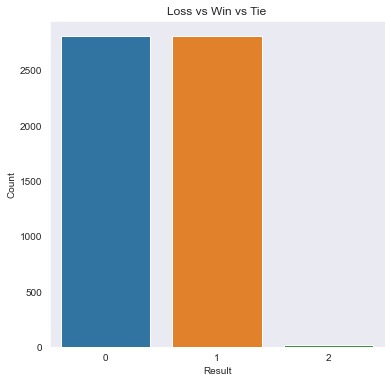

In [3]:
print('Counts')
print(nfl_cleaned['result'].value_counts())
print('')
print('Percentages')
print(round(nfl_cleaned['result'].value_counts(normalize = True)*100, 2))

# plot counts
sns.set_style('dark')
plt.rcParams['figure.figsize'] = [6,6]
sns.countplot(x = 'result', data = nfl_cleaned, label = 'Count')
plt.title('Loss vs Win vs Tie')
plt.xlabel('Result')
plt.ylabel('Count')
plt.show()

Counts
1    2744
0    2744
2     144
Name: spread_outcome, dtype: int64

Percentages
1    48.72
0    48.72
2     2.56
Name: spread_outcome, dtype: float64


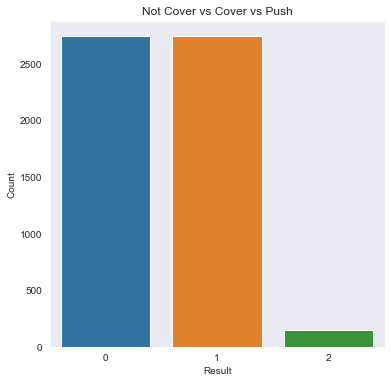

In [4]:
print('Counts')
print(nfl_cleaned['spread_outcome'].value_counts())
print('')
print('Percentages')
print(round(nfl_cleaned['spread_outcome'].value_counts(normalize = True)*100, 2))

# plot counts
sns.set_style('dark')
plt.rcParams['figure.figsize'] = [6,6]
sns.countplot(x = 'spread_outcome', data = nfl_cleaned, label = 'Count')
plt.title('Not Cover vs Cover vs Push')
plt.xlabel('Result')
plt.ylabel('Count')
plt.show()

Counts
0    2784
1    2774
2      74
Name: ou_result, dtype: int64

Percentages
0    49.43
1    49.25
2     1.31
Name: ou_result, dtype: float64


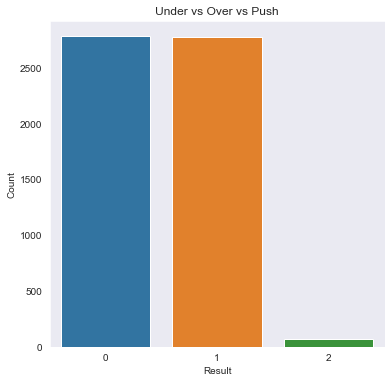

In [5]:
print('Counts')
print(nfl_cleaned['ou_result'].value_counts())
print('')
print('Percentages')
print(round(nfl_cleaned['ou_result'].value_counts(normalize = True)*100, 2))

# plot counts
sns.set_style('dark')
plt.rcParams['figure.figsize'] = [6,6]
sns.countplot(x = 'ou_result', data = nfl_cleaned, label = 'Count')
plt.title('Under vs Over vs Push')
plt.xlabel('Result')
plt.ylabel('Count')
plt.show()

In [6]:
# drop the Week 1, as the averages have 0 data
index_names = nfl_cleaned[(nfl_cleaned['week'] == 1)].index
nfl_cleaned.drop(index_names, inplace = True)
print(len(nfl_cleaned))

5282


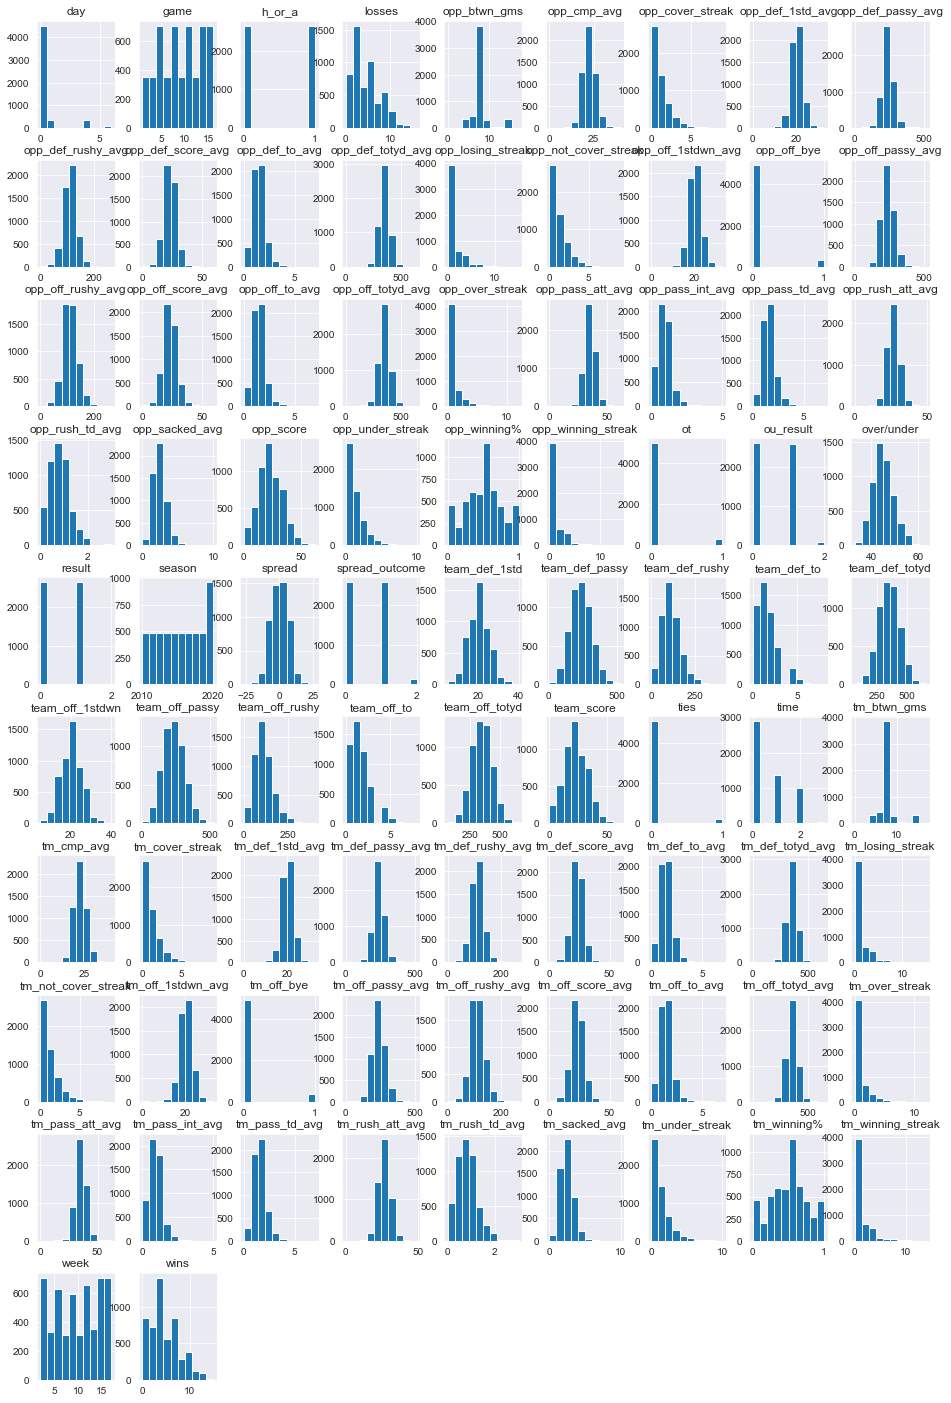

In [7]:
# plot histograms of everything
plt.rcParams['figure.figsize'] = [16,25]
nfl_cleaned.hist()
plt.show()

In [8]:
# var for off vs def averages
tmoff_vs_oppdef = ['tm_off_score_avg', 'opp_def_score_avg', 'tm_off_1stdwn_avg', 'opp_def_1std_avg',
                   'tm_off_totyd_avg', 'opp_def_totyd_avg', 'tm_off_passy_avg', 'opp_def_passy_avg',
                   'tm_off_rushy_avg', 'opp_def_rushy_avg', 'tm_off_to_avg', 'opp_def_to_avg']

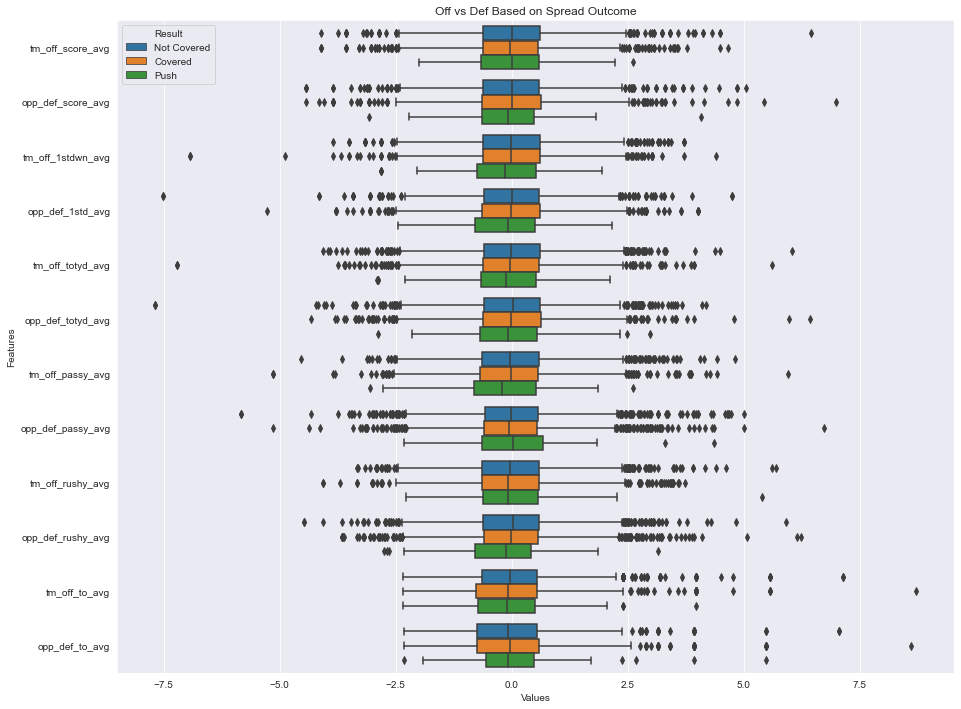

In [9]:
# off_vs_def violin plots based on spread outcome
off_vs_def = nfl_cleaned[tmoff_vs_oppdef]

#normalize data
off_vs_def_norm = (off_vs_def - off_vs_def.mean()) / (off_vs_def.std())
off_vs_def_norm.insert(loc = 0, column = 'spread_outcome', value = nfl_cleaned['spread_outcome'])
off_vs_def = pd.melt(off_vs_def_norm, id_vars = 'spread_outcome', var_name = 'features', value_name = 'value')

# plot data
sns.set_style('darkgrid')
plt.figure(figsize = (15,12))
ax = sns.boxplot(x = 'value', y = 'features', hue = 'spread_outcome', orient = "h", data = off_vs_def)
plt.title('Off vs Def Based on Spread Outcome')
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Not Covered', 'Covered', 'Push'], title = 'Result', loc = 'upper left')
plt.xlabel('Values')
plt.ylabel('Features')
plt.show()

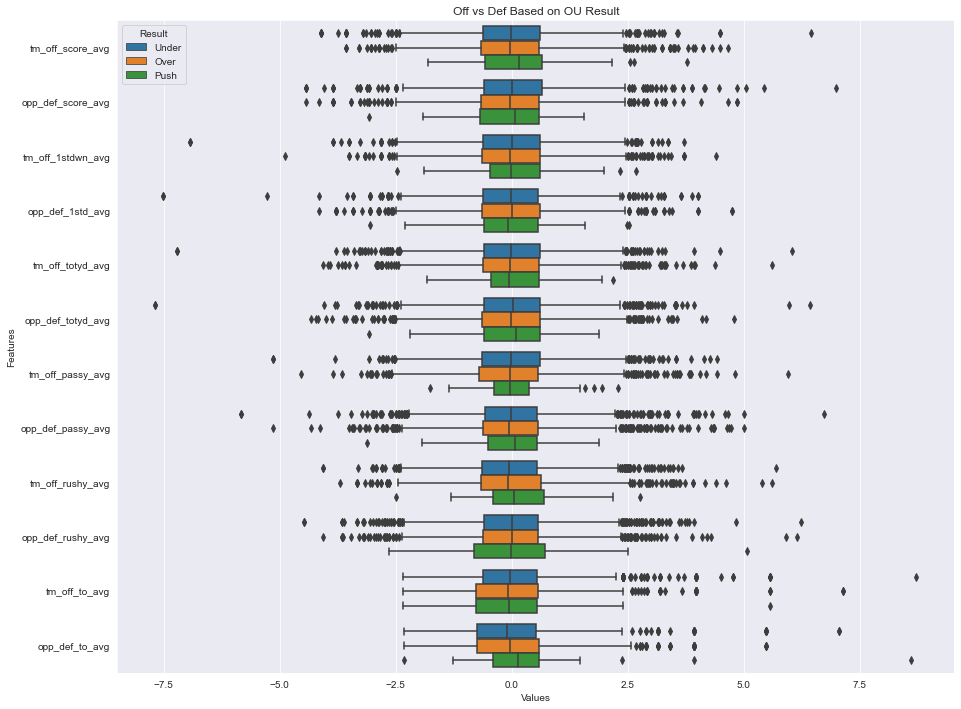

In [10]:
# off_vs_def violin plots based on O/U result
off_vs_def = nfl_cleaned[tmoff_vs_oppdef]

#normalize data
off_vs_def_norm = (off_vs_def - off_vs_def.mean()) / (off_vs_def.std())
off_vs_def_norm.insert(loc = 0, column = 'ou_result', value = nfl_cleaned['ou_result'])
off_vs_def = pd.melt(off_vs_def_norm, id_vars = 'ou_result', var_name = 'features', value_name = 'value')

# plot data
plt.figure(figsize = (15, 12))
ax = sns.boxplot(y = 'features', x = 'value', hue = 'ou_result', orient = "h", data = off_vs_def)
plt.title('Off vs Def Based on OU Result')
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Under', 'Over', 'Push'], title = 'Result', loc = 'upper left')
plt.xlabel('Values')
plt.ylabel('Features')
plt.show()

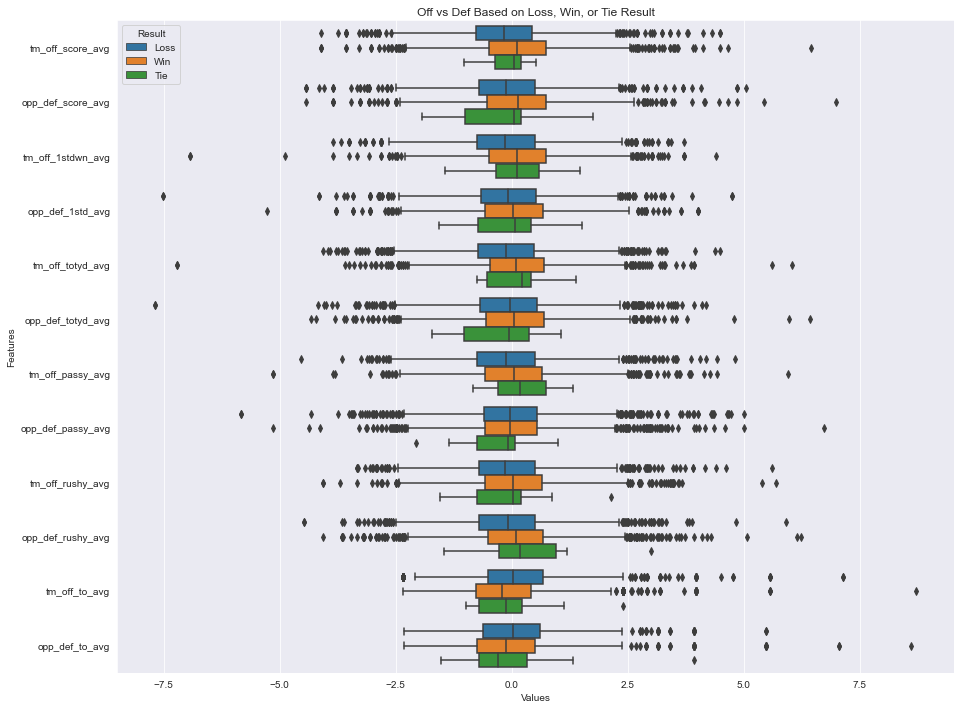

In [11]:
# off_vs_def violin plots based on Win, Loss, Tie result
off_vs_def = nfl_cleaned[tmoff_vs_oppdef]

#normalize data
off_vs_def_norm = (off_vs_def - off_vs_def.mean()) / (off_vs_def.std())
off_vs_def_norm.insert(loc = 0, column = 'result', value = nfl_cleaned['result'])
off_vs_def = pd.melt(off_vs_def_norm, id_vars = 'result', var_name = 'features', value_name = 'value')

# plot data
plt.figure(figsize = (15, 12))
ax = sns.boxplot(y = 'features', x = 'value', hue = 'result', orient = "h", data = off_vs_def)
plt.title('Off vs Def Based on Loss, Win, or Tie Result')
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Loss', 'Win','Tie'], title = 'Result', loc = 'upper left')
plt.xlabel('Values')
plt.ylabel('Features')
plt.show()

In [12]:
# shrink dataframe to remove weekly statistics and season
nfl_smaller = ['season', 'week', 'game', 'day', 'time', 'tm_off_bye', 'opp_off_bye', 'tm_btwn_gms', 'opp_btwn_gms', 
               'h_or_a', 'team', 'opp', 'tm_winning%', 'opp_winning%', 
               'tm_off_score_avg', 'tm_def_score_avg', 'tm_off_1stdwn_avg', 'tm_off_totyd_avg', 'tm_off_passy_avg',
               'tm_cmp_avg', 'tm_pass_att_avg', 'tm_pass_td_avg', 'tm_pass_int_avg', 'tm_sacked_avg', 'tm_off_rushy_avg',
               'tm_rush_att_avg', 'tm_rush_td_avg', 'tm_off_to_avg', 'tm_def_1std_avg', 'tm_def_totyd_avg',
               'tm_def_passy_avg','tm_def_rushy_avg', 'tm_def_to_avg', 'tm_losing_streak', 'tm_winning_streak', 
               'tm_not_cover_streak', 'tm_cover_streak', 'tm_under_streak', 'tm_over_streak',
               'opp_off_score_avg', 'opp_def_score_avg', 'opp_off_1stdwn_avg', 'opp_off_totyd_avg', 'opp_off_passy_avg', 
               'opp_cmp_avg', 'opp_pass_att_avg', 'opp_pass_td_avg', 'opp_pass_int_avg', 'opp_sacked_avg', 
               'opp_off_rushy_avg', 'opp_rush_att_avg', 'opp_rush_td_avg', 'opp_off_to_avg', 'opp_def_1std_avg',
               'opp_def_totyd_avg', 'opp_def_passy_avg', 'opp_def_rushy_avg', 'opp_def_to_avg', 'opp_losing_streak',
               'opp_winning_streak', 'opp_not_cover_streak', 'opp_cover_streak', 'opp_under_streak', 'opp_over_streak',
               'result', 'team_score', 'opp_score', 'spread', 'spread_outcome', 'over/under', 'ou_result']  

df_short = nfl_cleaned[nfl_smaller]
df_short.head()

,season,week,game,day,time,tm_off_bye,opp_off_bye,tm_btwn_gms,opp_btwn_gms,h_or_a,team,opp,tm_winning%,opp_winning%,tm_off_score_avg,tm_def_score_avg,tm_off_1stdwn_avg,tm_off_totyd_avg,tm_off_passy_avg,tm_cmp_avg,tm_pass_att_avg,tm_pass_td_avg,tm_pass_int_avg,tm_sacked_avg,tm_off_rushy_avg,tm_rush_att_avg,tm_rush_td_avg,tm_off_to_avg,tm_def_1std_avg,tm_def_totyd_avg,tm_def_passy_avg,tm_def_rushy_avg,tm_def_to_avg,tm_losing_streak,tm_winning_streak,tm_not_cover_streak,tm_cover_streak,tm_under_streak,tm_over_streak,opp_off_score_avg,opp_def_score_avg,opp_off_1stdwn_avg,opp_off_totyd_avg,opp_off_passy_avg,opp_cmp_avg,opp_pass_att_avg,opp_pass_td_avg,opp_pass_int_avg,opp_sacked_avg,opp_off_rushy_avg,opp_rush_att_avg,opp_rush_td_avg,opp_off_to_avg,opp_def_1std_avg,opp_def_totyd_avg,opp_def_passy_avg,opp_def_rushy_avg,opp_def_to_avg,opp_losing_streak,opp_winning_streak,opp_not_cover_streak,opp_cover_streak,opp_under_streak,opp_over_streak,result,team_score,opp_score,spread,spread_outcome,over/under,ou_result
1,2010,2,2,0,0,0,0,7,7,1,Buffalo Bills,Green Bay Packers,0.0,1.000,10.000000,15.00,9.0,166.00,116.000000,18.000000,34.000000,1.00,0.000000,3.000000,50.000000,17.000000,0.000000,0.000000,19.000000,296.000000,164.000000,132.0,0.000000,1.0,0.0,1.0,0.0,1.0,0.0,27.000000,20.000000,22.000000,299.000000,167.000000,19.000000,31.000000,2.000000,2.00,3.000000,132.000000,33.000000,1.000000,2.000000,16.000000,320.000000,171.000000,149.000000,1.000000,0.0,1.0,0.0,1.0,1.0,0.0,0,7.0,34.0,13.0,0,43.0,0
2,2010,3,3,0,0,0,0,7,7,1,Buffalo Bills,New England Patriots,0.0,0.500,8.500000,24.50,11.5,176.00,89.000000,14.500000,26.000000,0.50,1.000000,3.500000,87.000000,24.500000,0.500000,1.000000,18.500000,321.000000,209.500000,111.5,0.000000,2.0,0.0,2.0,0.0,2.0,0.0,26.000000,26.000000,20.000000,333.500000,248.500000,22.500000,35.500000,2.500000,1.00,0.500000,85.000000,21.500000,0.000000,1.500000,24.500000,382.000000,270.500000,111.500000,1.000000,1.0,0.0,1.0,0.0,0.0,2.0,0,30.0,38.0,14.5,1,43.0,1
3,2010,4,4,0,0,0,0,7,7,0,Buffalo Bills,New York Jets,0.0,0.667,15.666667,29.00,14.0,242.00,139.333333,16.333333,26.666667,1.00,1.333333,2.666667,102.666667,24.333333,0.333333,1.333333,20.666667,362.333333,221.333333,141.0,0.333333,3.0,0.0,0.0,1.0,0.0,1.0,22.666667,15.666667,16.333333,304.666667,172.000000,15.333333,26.333333,2.000000,0.00,1.666667,132.666667,27.333333,0.333333,0.333333,21.333333,336.333333,274.666667,61.666667,2.333333,0.0,2.0,0.0,2.0,0.0,2.0,0,14.0,38.0,6.0,0,37.0,1
4,2010,5,5,0,0,0,0,7,7,0,Buffalo Bills,Jacksonville Jaguars,0.0,0.500,15.250000,31.25,13.5,237.25,131.750000,15.250000,26.750000,1.25,1.000000,2.750000,105.500000,22.250000,0.250000,1.500000,21.750000,382.750000,208.750000,174.0,0.250000,4.0,0.0,1.0,0.0,0.0,2.0,17.750000,27.750000,18.500000,294.250000,164.750000,18.000000,28.750000,1.500000,1.25,2.500000,129.500000,31.250000,0.500000,1.750000,22.250000,404.750000,303.750000,101.000000,1.750000,0.0,1.0,0.0,1.0,0.0,1.0,0,26.0,36.0,-2.5,0,41.5,1
5,2010,7,6,0,0,1,0,14,7,1,Buffalo Bills,Baltimore Ravens,0.0,0.667,17.400000,32.20,14.2,251.00,144.600000,16.200000,27.400000,1.60,0.800000,2.800000,106.400000,22.000000,0.200000,1.200000,21.600000,382.400000,200.000000,182.4,0.800000,5.0,0.0,2.0,0.0,0.0,3.0,18.666667,15.833333,20.666667,336.333333,224.833333,20.833333,34.333333,1.166667,1.00,1.333333,111.500000,32.166667,1.000000,1.500000,15.166667,280.500000,175.000000,105.500000,0.833333,1.0,0.0,0.0,0.0,1.0,0.0,0,34.0,37.0,12.5,1,40.0,1


In [13]:
# create 3 data sets for data pre-2020 season (total season, spreads, over/unders)
df_pre2020 = df_short.copy()
df_pre2020 = df_pre2020[df_pre2020.season != 2020]

# split into two dataframes for predicting covers and one for spreads
df_pre2020_spread = df_pre2020.drop(['result', 'ou_result', 'team_score', 'opp_score'], axis = 1)
df_pre2020_OU = df_pre2020.drop(['result', 'spread_outcome', 'team_score', 'opp_score'], axis = 1)

In [14]:
# dropping games with results ending in a tie, as 0.32% of games played end in a tie from df_short
#(causing issues with future predictions)
ties = df_pre2020[(df_pre2020.result == 2)].index
df_pre2020.drop(ties, inplace = True)   

# dropping Spread Games that end in a push from df_spread, as 2.57% of games played end in a push
#(causing issues with future predictions)                               
spread_push = df_pre2020_spread[(df_pre2020_spread.spread_outcome == 2)].index               
df_pre2020_spread.drop(spread_push, inplace = True)

# dropping OU games that end in a push from df_OU, as 1.32% of games played end in a push
# (causing issues with future predictions)
OU_push = df_pre2020_OU[(df_pre2020_OU.ou_result == 2)].index               
df_pre2020_OU.drop(OU_push, inplace = True)

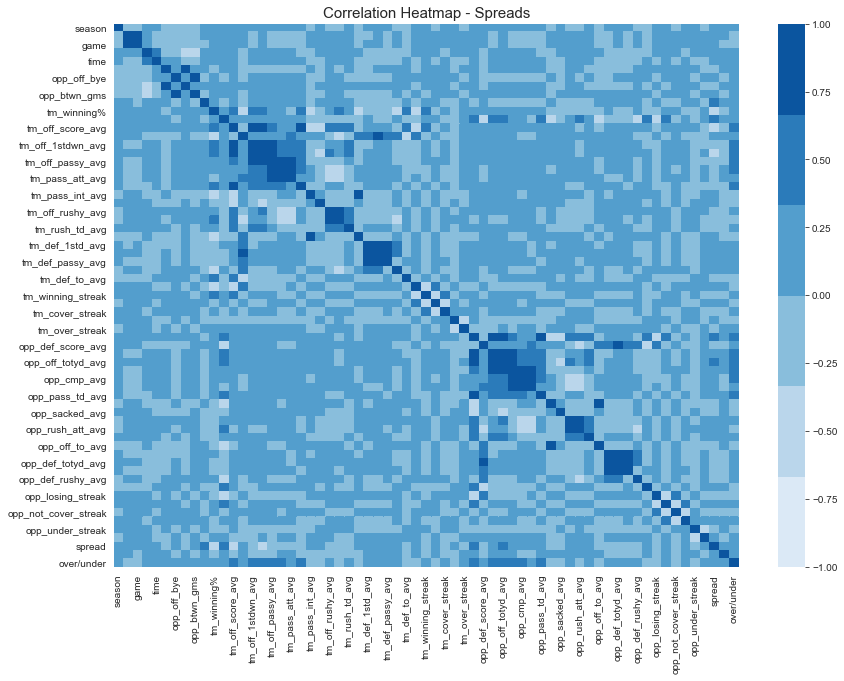

In [15]:
# plot correlation heatmap df_pre2020_spread
plt.figure(figsize = (14,10))
corr = df_pre2020_spread.corr()
colormap = sns.color_palette('Blues') 
sns.heatmap(corr, cmap = colormap, vmin = -1, vmax = 1, annot = False)
plt.title('Correlation Heatmap - Spreads', fontdict={'fontsize':15})
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.show()

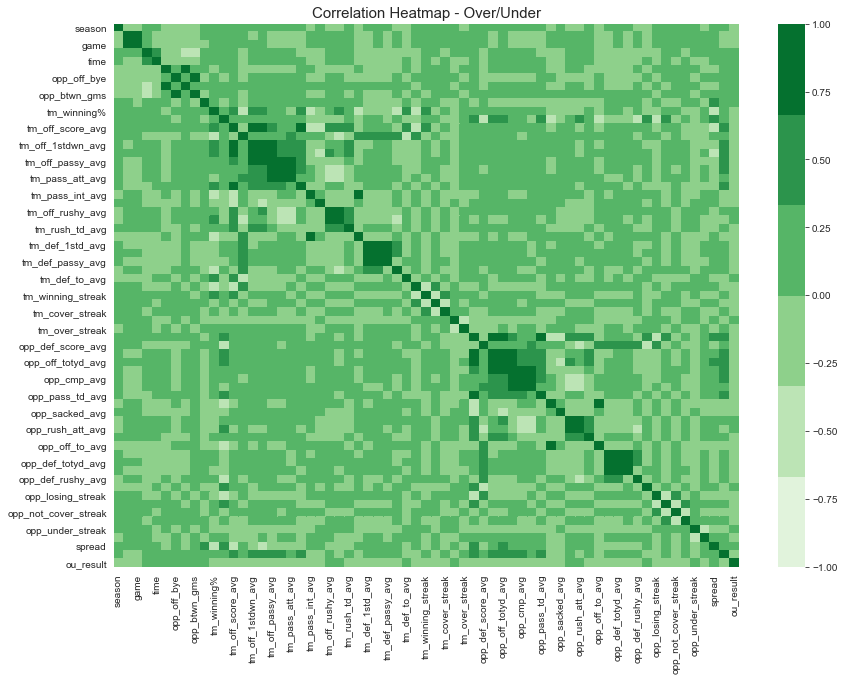

In [16]:
# plot correlation heatmap - df_pre2020_OU
plt.figure(figsize = (14,10))
corr2 = df_pre2020_OU.corr()
colormap = sns.color_palette('Greens') 
sns.heatmap(corr2, cmap = colormap, vmin = -1, vmax = 1, annot = False)
plt.title('Correlation Heatmap - Over/Under', fontdict={'fontsize':15})
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.show()

In [17]:
# save each dataframe for feature selection and modeling
df_pre2020_spread.to_csv('..\\Data\\NFL_Spread_Data_Pre2020.csv', index = False) 
print('df_pre2020_spread has been saved as CSV file')
df_pre2020_OU.to_csv('..\\Data\\NFL_OU_Data_Pre2020.csv', index = False) 
print('df_pre2020_OU has been saved as CSV file')
df_pre2020.to_csv('..\\Data\\Compressed_NFL_Data_Pre2020.csv', index = False) 
print('df_pre2020 has been saved as CSV file')

df_pre2020_spread has been saved as CSV file
df_pre2020_OU has been saved as CSV file
df_pre2020 has been saved as CSV file


In [18]:
df_2020 = df_short.copy()
df_2020 = df_2020[(df_2020.season == 2020)]

def weeks_2020():
    # data files for Season 2020 Weeks 2-17
    df_2020_w2 = df_2020[(df_2020.week == 2)]
    df_2020_w2.to_csv('..\\Data\\df_2020_w2.csv', index = False) 
    print('df_2020_w2 has been saved as CSV file')
    
    df_2020_w3 = df_2020[(df_2020.week == 3)]
    df_2020_w3.to_csv('..\\Data\\df_2020_w3.csv', index = False) 
    print('df_2020_w3 has been saved as CSV file')

    df_2020_w4 = df_2020[(df_2020.week == 4)]
    df_2020_w4.to_csv('..\\Data\\df_2020_w4.csv', index = False) 
    print('df_2020_w4 has been saved as CSV file')

    df_2020_w5 = df_2020[(df_2020.week == 5)]
    df_2020_w5.to_csv('..\\Data\\df_2020_w5.csv', index = False) 
    print('df_2020_w5 has been saved as CSV file')

    df_2020_w6 = df_2020[(df_2020.week == 6)]
    df_2020_w6.to_csv('..\\Data\\df_2020_w6.csv', index = False) 
    print('df_2020_w6 has been saved as CSV file')

    df_2020_w7 = df_2020[(df_2020.week == 7)]
    df_2020_w7.to_csv('..\\Data\\df_2020_w7.csv', index = False) 
    print('df_2020_w7 has been saved as CSV file')

    df_2020_w8 = df_2020[(df_2020.week == 8)]
    df_2020_w8.to_csv('..\\Data\\df_2020_w8.csv', index = False) 
    print('df_2020_w8 has been saved as CSV file')

    df_2020_w9 = df_2020[(df_2020.week == 9)]
    df_2020_w9.to_csv('..\\Data\\df_2020_w9.csv', index = False) 
    print('df_2020_w9 has been saved as CSV file')

    df_2020_w10 = df_2020[(df_2020.week == 10)]
    df_2020_w10.to_csv('..\\Data\\df_2020_w10.csv', index = False) 
    print('df_2020_w10 has been saved as CSV file')

    df_2020_w11 = df_2020[(df_2020.week == 11)]
    df_2020_w11.to_csv('..\\Data\\df_2020_w11.csv', index = False) 
    print('df_2020_w11 has been saved as CSV file')

    df_2020_w12 = df_2020[(df_2020.week == 12)]
    df_2020_w12.to_csv('..\\Data\\df_2020_w12.csv', index = False) 
    print('df_2020_w12 has been saved as CSV file')

    df_2020_w13 = df_2020[(df_2020.week == 13)]
    df_2020_w13.to_csv('..\\Data\\df_2020_w13.csv', index = False)
    print('df_2020_w13 has been saved as CSV file')
    
    df_2020_w14 = df_2020[(df_2020.week == 14)]
    df_2020_w14.to_csv('..\\Data\\df_2020_w14.csv', index = False) 
    print('df_2020_w14 has been saved as CSV file')
    
    df_2020_w15 = df_2020[(df_2020.week == 15)]
    df_2020_w15.to_csv('..\\Data\\df_2020_w15.csv', index = False) 
    print('df_2020_w15 has been saved as CSV file')
    
    df_2020_w16 = df_2020[(df_2020.week == 16)]
    df_2020_w16.to_csv('..\\Data\\df_2020_w16.csv', index = False) 
    print('df_2020_w16 has been saved as CSV file')
    
    df_2020_w17 = df_2020[(df_2020.week == 17)]
    df_2020_w17.to_csv('..\\Data\\df_2020_w17.csv', index = False) 
    print('df_2020_w17 has been saved as CSV file')

In [19]:
weeks_2020()

df_2020_w2 has been saved as CSV file
df_2020_w3 has been saved as CSV file
df_2020_w4 has been saved as CSV file
df_2020_w5 has been saved as CSV file
df_2020_w6 has been saved as CSV file
df_2020_w7 has been saved as CSV file
df_2020_w8 has been saved as CSV file
df_2020_w9 has been saved as CSV file
df_2020_w10 has been saved as CSV file
df_2020_w11 has been saved as CSV file
df_2020_w12 has been saved as CSV file
df_2020_w13 has been saved as CSV file
df_2020_w14 has been saved as CSV file
df_2020_w15 has been saved as CSV file
df_2020_w16 has been saved as CSV file
df_2020_w17 has been saved as CSV file
